## Лабораторная работа №1 по дисциплине "Математическое моделирование" ##
### Вариант ХХII: Сорокин Никита ###
### Задание А: Построение фазового портрета колебаний. ###


Дано нелинейное дифференциальное уравнение второго порядка

$$ \ddot{x} - \frac{1}{\sqrt{(x+l)^2+a^2}} + \frac{1}{\sqrt{(x-l)^2+a^2}} = 0 $$

Здесь $ l, a $ - параметры задачи.
1. Получите потенциальную энергию $ \Pi(x) $ системы.
2. Запишите интеграл энергии.
3. Для случая $ l = 1, a = 3 $ постройте график потенциальной энергии.
4. С помощью графика потенциальной энергии постройте фазовый портрет колебаний, укажите характерные элементы фазового портрета: положения равновесия $ x = x_{*}, \dot{x} = 0, $ замкнутые траектории, сепаратрису.
5. Получите зависимость $ T(a) $ периода колебаний от начальной амплитуды в виде квадратуры, численно постройте график этой зависимости объясните поведение графика функции $ T(a) $.


### Решение: ###

1. Имеем уравнение вида: 

$$ \ddot{x} - \frac{1}{\sqrt{(x+l)^2+a^2}} + \frac{1}{\sqrt{(x-l)^2+a^2}} = 0 $$

Здесь

$$ f(x) = - \frac{1}{\sqrt{(x+l)^2+a^2}} + \frac{1}{\sqrt{(x-l)^2+a^2}} $$

Получим потенциальную энергию $ \Pi(x) $ проинтегрировав $ f(x) $ в пределах от $ 0 $ до $ x $:

$$ 
\Pi(x) = \int_{0}^{x}{f(x)}dx = \int_{0}^{x} - \frac{1}{\sqrt{(x+l)^2+a^2}} + \frac{1}{\sqrt{(x-l)^2+a^2}}dx = 
asinh \left( \frac{-l + x}{a}  \right) - asinh \left( \frac{l + x}{a} \right)
$$


2. Далее, для получения интеграла энергии перепишем исходное уравнение в следующем виде и проинтегрируем:

$$
\ddot{x} = \frac{d\dot{x}}{dt} = \frac{d\dot{x}}{dx} \frac{dx}{dt}
$$

$$
\ddot{x} = -f(x), \quad \frac{d\dot{x}}{dx} \frac{dx}{dt} = -f(x), \quad
\int{\dot{x}d\dot{x}} = -\int{f(x)dx}, 
$$

$$
\frac{\dot{x}^2}{2}+\Pi(x)=C
$$



3. Построим график потенциальной энергии для $ l = 1, a = 3$:

In [105]:
from sympy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
x = Symbol('x')
l = Symbol('l')
a = Symbol('a')

In [4]:
P = - asinh((l+x)/a) + asinh((-l+x)/a)
P_chosen = P.subs([(l, 1), (a, 3)])
P_chosen

asinh(x/3 - 1/3) - asinh(x/3 + 1/3)

In [5]:
P_chosen.subs([(x, 0)])

-2*asinh(1/3)

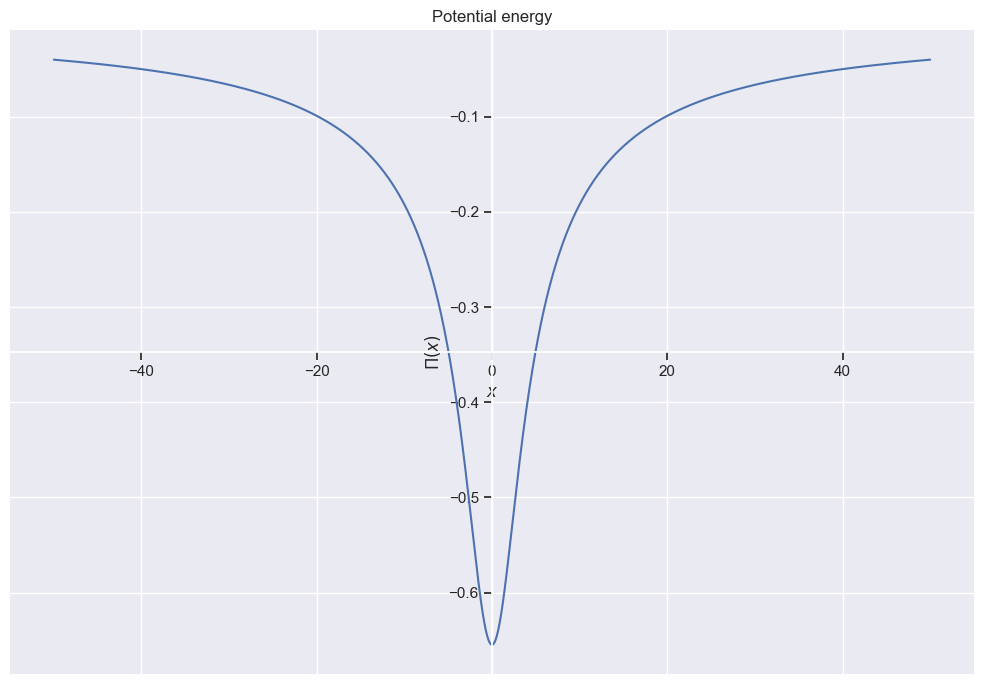

In [44]:
plot(P_chosen, (x, -50, 50), size=(10, 7), adaptive=False, nb_of_points=10000, 
     xlabel="$ x $", ylabel="$ \Pi(x) $",title="Potential energy")

4. Для построения фазового портрета колебаний выразим $ \dot{x} $ из интеграла энергии:

$$
\dot{x} = \pm \sqrt{2C-2\Pi(x)} = \pm \sqrt{2C-2 \left[ - asinh \left( \frac{1+x}{3}\right) + asinh \left(\frac{-1+x}{3} \right) \right] }
$$

Для дальнейшего определения частот колебаний определим значения амплитуд $ a $ и соответстующих им констант $ C $:

Амплитуда колебания  $ a $ определяется как значение $ x $ в момент того, как фазовая кривая проходит $ \dot{x} = 0$:

$$

\dot{x} = \pm \sqrt{2C-2\Pi(x)} = 0 \Rightarrow C = \Pi(x)

$$

$$

\begin{align*}

a &= 1: C = \Pi(1) = -asinh(2/3) \\ 
a &= 2: C = \Pi(2) = -log(1 + sqrt(2)) + asinh(1/3) \\ 
a &= 3: C = \Pi(3) = -asinh(4/3) + asinh(2/3) \\ 
a &= 4: C = \Pi(4) = -asinh(5/3) + log(1 + sqrt(2)) \\ 
a &= 5: C = \Pi(5) = -asinh(2) + asinh(4/3) \\ 
a &= 6: C = \Pi(6) = -asinh(7/3) + asinh(5/3) \\ 
a &= 7: C = \Pi(7) = -asinh(8/3) + asinh(2) \\ 
a &= 8: C = \Pi(8) = -asinh(3) + asinh(7/3) \\ 
a &= 9: C = \Pi(9) = -asinh(10/3) + asinh(8/3) \\ 
a &= 10: C = \Pi(10) = -asinh(11/3) + asinh(3) \\ 

\end{align*}

$$

In [66]:
C = Symbol('C')
xdot_pos = sqrt(2*C - 2 * (-asinh((1+x)/3) + asinh((-1+x)/3)))
xdot_neg = - sqrt(2*C - 2 * (-asinh((1+x)/3) + asinh((-1+x)/3)))

Фазовый портрет для параметров с удобно подобранными амплитудами:

Выбранные параметры С: [-0.625145117250417, -0.553923436782285, -0.473467171417693, -0.402422075723650, -0.345023186510701, -0.299693343861911, -0.263775960864320, -0.234957452626963, -0.211485036055401, -0.192080522670777]


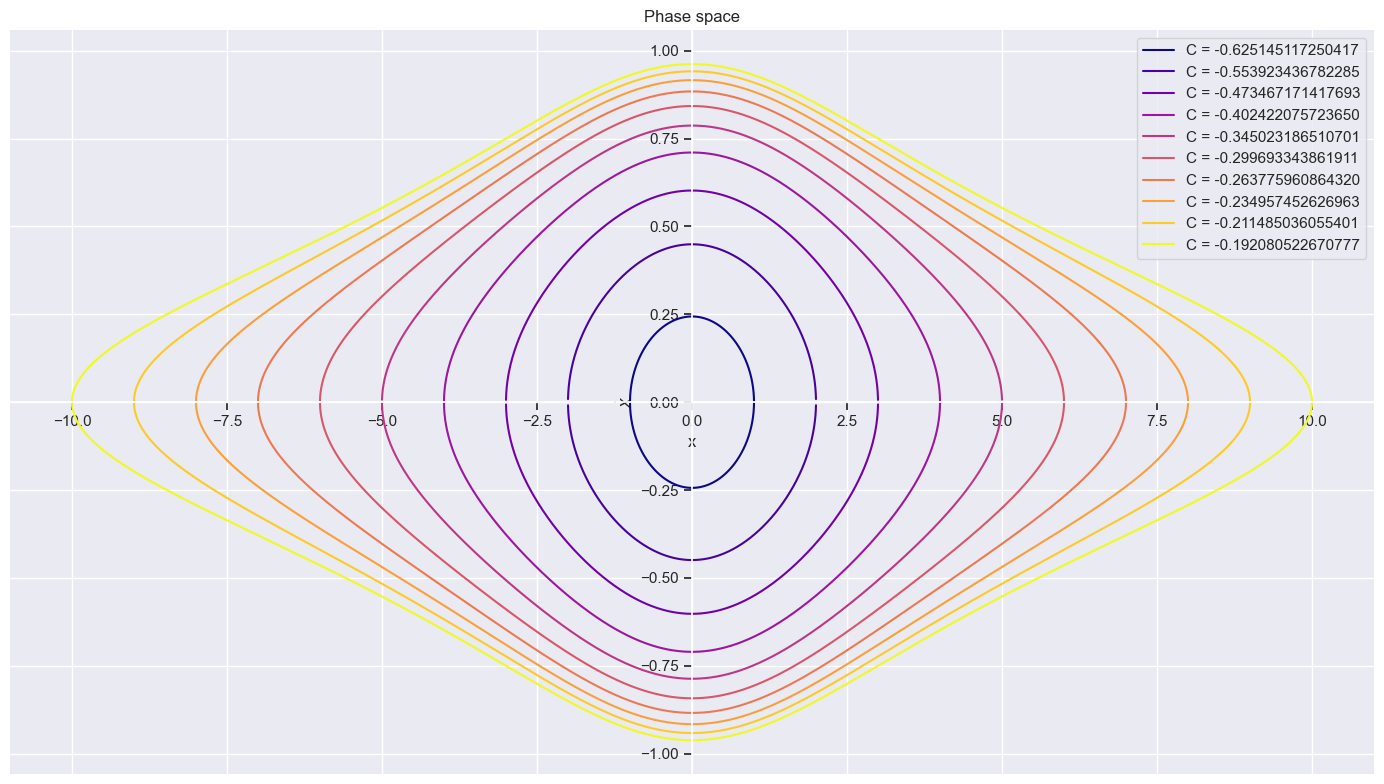

In [76]:
C_params = [- asinh((i + 1) / 3) + asinh((i - 1) / 3) for i in range(1, 11)]

def phase_space(C_params):

    print(f"Выбранные параметры С: {C_params}")

    p = plot(size=(14, 8), show=False,
            xlabel='x', ylabel='$\dot{x}$',
            title='Phase space')

    colors = mpl.cm.plasma(np.linspace(0, 1, len(C_params)))[:, :-1]

    for i in range(len(C_params)):
        xdot_pos_new = xdot_pos.subs([(C, C_params[i])])
        p1 = plot(xdot_pos_new, (x, -30, 30), line_color = colors[i], show=False, adaptive=False, nb_of_points=100000)
        p.append(p1[0])

        xdot_neg_new = xdot_neg.subs([(C, C_params[i])])
        p1 = plot(xdot_neg_new, (x, -30, 30), line_color = colors[i], show=False, adaptive=False, nb_of_points=100000)
        p.append(p1[0])

        p[2 * i].label = f"C = {C_params[i]}"
        p[2 * i + 1].label = "_nolabel_"

    p.legend = True
    p.show()

phase_space(C_params)

Фазовый портрет с произвольно подобранными параметрами для которых существуют фазовые кривые:

Выбранные параметры С: [-0.6549003  -0.57102249 -0.48714468 -0.40326687 -0.31938906 -0.23551124
 -0.15163343 -0.06775562  0.01612219  0.1       ]


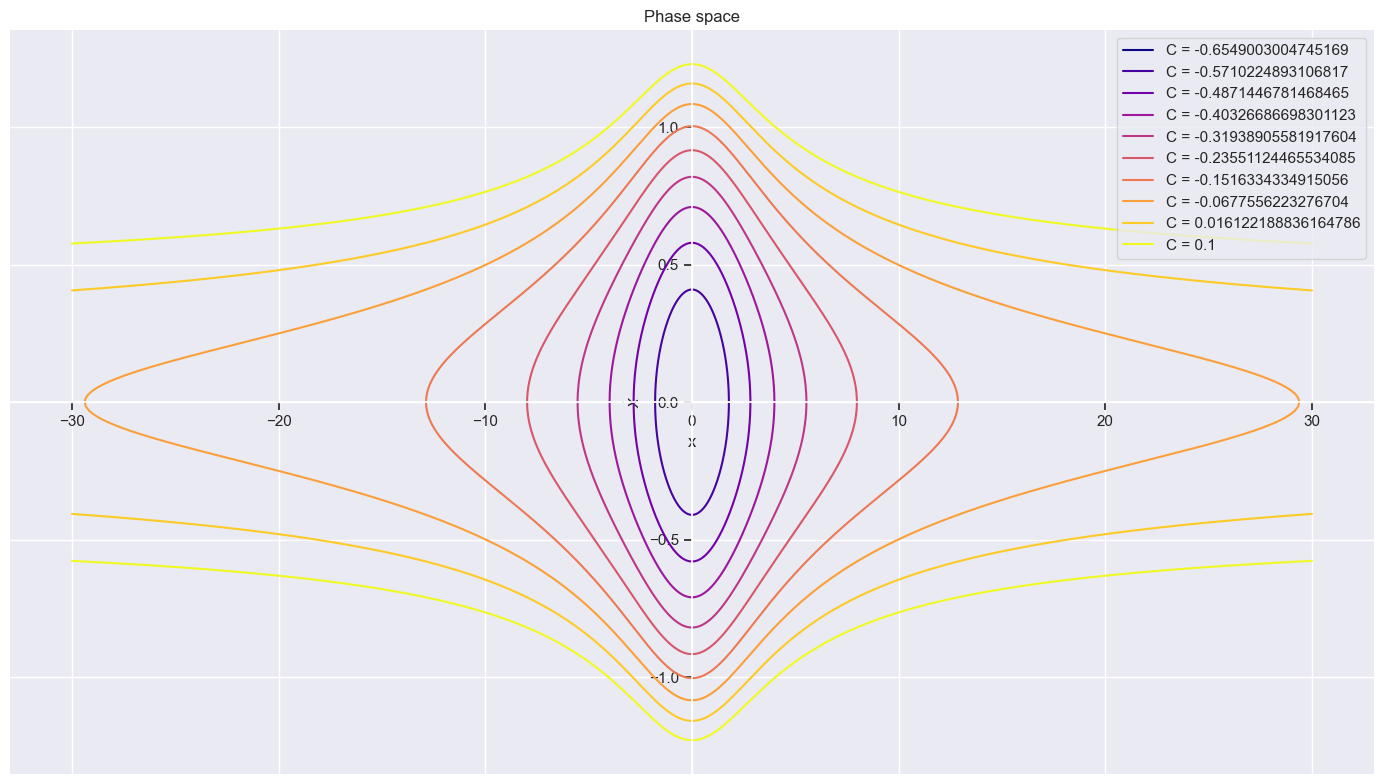

In [75]:
C2_params = np.linspace(-2 * np.arcsinh(1 / 3), 0.1, 10)

phase_space(C_params)

- Положения равновесия

Из механики известно, что консервативаная система находится в положении равновесия $ \Leftrightarrow  \frac{\partial \Pi}{\partial x} = 0 $. Система является консвервативной в виду существования интеграла энергии. Как видно по графику потенциальной энергии в точке $ 0 $ имеется локальный минимум. Следовательно, имеем $ \frac{\partial \Pi}{\partial x}|_{0} = 0 $.

Проверим это формально:

$$
\frac{\partial \Pi}{\partial x} = \frac{1}{3 \sqrt{(x/3 + 1/3)^2 + 1}} - \frac{1}{3 \sqrt{(x/3 - 1/3)^2 + 1}} = 0, 
\quad \Rightarrow \quad x = 0
$$

Далее воспользуемся теоремой Лагранжа: если в положении равновесия потенциальная энергия имеет локальный минимум, то положение равновесия устойчиво.

Следовательно, имеем точку $ x=0, \dot{x}=0 $ устойчивого равновесия.

- Замкнутые траектории

Замкнутые траектории соответствуют фазовым траекториям со значениями параматра $ C \in [-2 \, asinh \left(\frac{1}{3} \right) , 0) $. При $ C \geq 0 $ получается свободное движение. При $ C < -2 \, asinh \left(  \frac{1}{3} \right)  $ движение невозможно (выражение < 0 под корнем). 


- Сепаратриса

Сепаратрисой является фазовая кривая соответствующая коэффициенту $ C = 0 $, поскольку она является кривой разделяющий области с различными характерами движения.

5. Получим зависимость периода колебаний $ T(a) $ от начальной амплитуды $ a $:

$$

T(a) = 2 \int_{-a}^{a} dt = 2 \int_{-a}^{a} \frac{dx}{\dot{x}} = 2 \int_{-a}^{a} \frac{dx}{ \sqrt{2C-2\Pi(x) }}

$$

Воспользуемся полученными в прошлом пункте $ a $ и $ C $ :

Получаем следующие значения периода колебаний

$$

\begin{align*}

C &= -2asinh(1/3), \quad T(a) = 26.1569723985796 \\ 
C &= -asinh(2/3), \quad T(a) = 29.661 \\ 
C &= -log(1 + sqrt(2)) + asinh(1/3), \quad T(a) = 35.3355863091147 \\ 
C &= -asinh(4/3) + asinh(2/3), \quad T(a) = 42.8612282481483 \\ 
C &= -asinh(5/3) + log(1 + sqrt(2)), \quad T(a) = 51.9188 \\ 
C &= -asinh(2) + asinh(4/3), \quad T(a) = 62.267 \\ 
C &= -asinh(7/3) + asinh(5/3), \quad T(a) = 73.7356296339318 \\ 
C &= -asinh(8/3) + asinh(2), \quad T(a) = 86.2046100310807 \\ 
C &= -asinh(3) + asinh(7/3), \quad T(a) = 99.58 \\ 
C &= -asinh(10/3) + asinh(8/3), \quad T(a) = 113.81 \\ 

\end{align*}

$$

In [103]:
T = [
    26.1569723985796,
    29.661,
    35.3355863091147,
    42.8612282481483,
    51.9188,
    62.267,
    73.7356296339318,
    86.2046100310807,
    99.58,
    113.81
]

Построим график зависимости $ T(a) $ от $ a $:

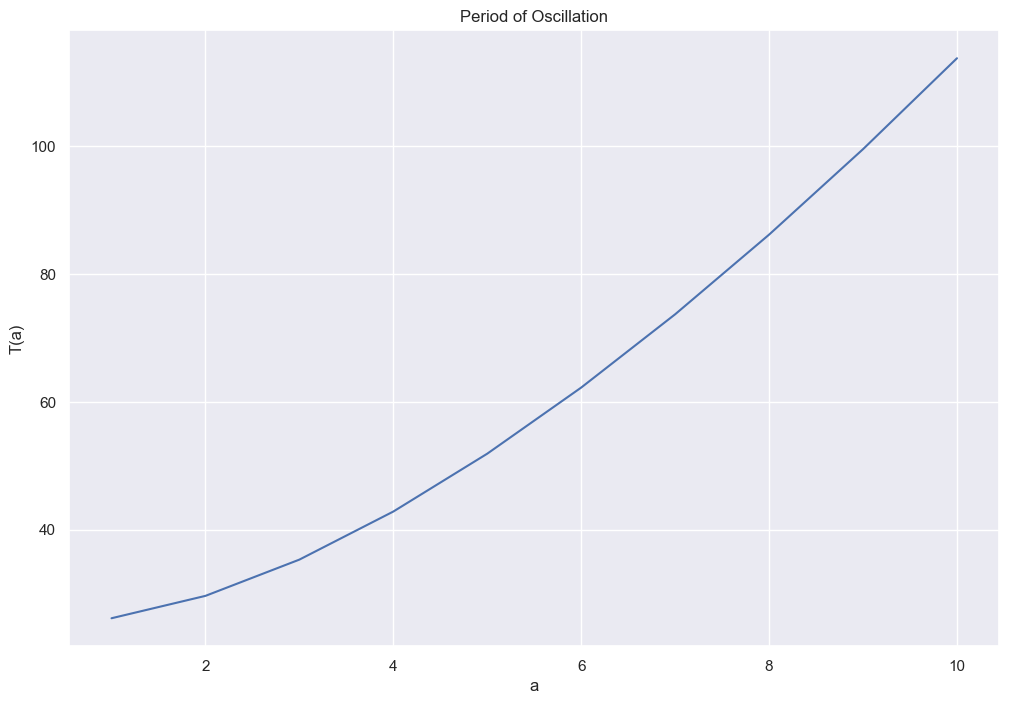

In [113]:
fig, axs = plt.subplots(figsize=(12, 8))

axs.set_title("Period of Oscillation")
axs.set_xlabel("a")
axs.set_ylabel("T(a)")

axs.plot(a, T)

При увелечении амплитуды период колебаний тоже увеличивается.